# DNA Sequencing for Detecting E.coli Virus

In [1]:
# import libriaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
import pickle 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

In [2]:
# load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [3]:
data.shape

(106, 3)

In [4]:
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

In [5]:
data.loc[:, "Class"]

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object

In [6]:
data["Class"]

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object

In [7]:
# Refining and structuring the data into feature and label
classes = data["Class"]
classes.value_counts()

+    53
-    53
Name: Class, dtype: int64

In [8]:
# generate a liist of the DNA sequences
sequence = list(data["Sequence"])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

## Data Preprocessing

We will start by removing the `"\t"` (tab) notation from the beginning of each dna sequence

In [9]:
# remove tab from each sequence
dic = {}

for i, seq in enumerate(sequence):
    nucleotides = list(seq) # ['\t','\t','t','a','a','c','a',]
    nucleotides = [char for char in nucleotides if char != '\t']
    # append class assignment
    nucleotides.append(classes[i])
    
    dic[i] = nucleotides

In [10]:
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [11]:
# convert the Dict into a dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [12]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
53,t,c,g,a,g,a,g,a,g,g,...,c,c,t,a,t,a,a,t,g,a
54,c,c,g,c,t,g,a,a,t,a,...,t,t,a,t,a,t,t,t,a,a
55,g,a,c,t,a,g,a,c,t,c,...,t,t,t,g,c,a,t,c,a,c
56,t,a,g,c,g,t,t,a,t,a,...,g,t,t,a,g,t,g,c,c,t
57,+,+,+,+,+,+,+,+,+,+,...,-,-,-,-,-,-,-,-,-,-


As we can see from the dataframe, the classes for each sequence is located at the last row, therefore we will need to transpose the dataframe

In [13]:
# transpose the dataframe to get the target column
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [14]:
# renmae the 57th column as it is our classes column
df.rename(columns={57:"Class"}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [15]:
# lets create a temporary copy of the dataframe
temp = df.copy(deep=True)

# drop the target column
temp = temp.drop(["Class"], axis=1)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


The independent variable which is the dna sequences are it string format, we will need to convert them to numbers so that the data can be fed to the model. We will be using `OneHotEncoder`

In [16]:
# encoding using one-hot encoder

enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(temp)

OneHotEncoder(handle_unknown='ignore')

In [17]:
# view the categories
enc.categories_

[array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dtype=object),
 array(['a', 'c', 'g', 't'], dty

In [18]:
len(enc.categories_)

57

In [19]:
# transform the fitted data and convert to an array
df1 = enc.transform(temp).toarray()
df1

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
len(df1[0])

228

We will save the fitted `OneHotEncoder` so that we can use it when deploying our model.

In [21]:
# saving the OneHotEncoder
with open("EColi-encoder.pickle", "wb") as f: 
    pickle.dump(enc, f) 

In [22]:
# convert the encoded array into a dataframe
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df_new.shape

(106, 228)

Alternative way to encode the string data using pandas `get_dummies()` method

In [24]:
pd.get_dummies(df.drop(columns=["Class"]))

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
102,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
103,0,1,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
104,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0


In [25]:
df["Class"]

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object

As we can see above, the classes above are in string format. `"+"` for a person with the presence of the E.coli Virus and `"-"` for a person with the virus absent. We will have to find a way to encode the classes into numbers. 1 for positive and 0 for negative. 

In [27]:
# Converting the classes to numerical values
df["Class"] = df["Class"].replace("+", 1)
df["Class"] = df["Class"].replace("-", 0)
df_new["Classes"] = df["Class"]
df_new

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
103,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Model Building

In [37]:
# Get the features and target
y = df_new['Classes'].values
X = df_new.drop(['Classes'], axis = 1).values

In [38]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)

(79, 27, 79, 27)

In [44]:
# instanciate the MLPCLassifier
model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), 
                      max_iter=300, 
                      activation="relu", 
                      solver="adam", 
                      random_state=1)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [45]:
# Predicting y for X_test 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9259259259259259

In [46]:
# Model Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



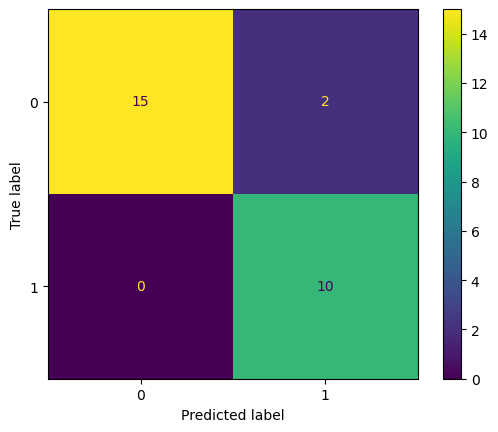

In [50]:
# view confusion metric 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

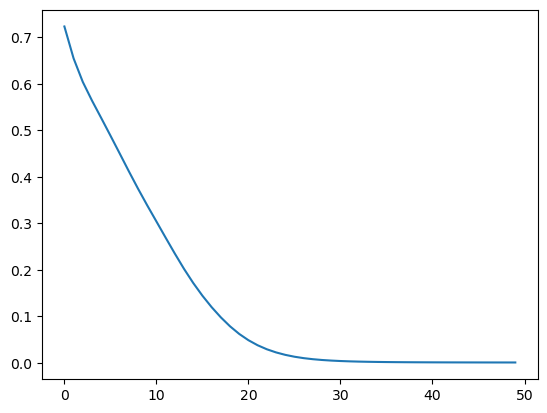

In [51]:
# Plotting graph for MLPCLassifier
loss_values = model.loss_curve_
plt.plot(loss_values);

In [52]:
file_name = "E-Coli_model.pickle"
pickle.dump(model, open(file_name, "wb"))